In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils

In [11]:
img = cv.imread('photos/IMG_7864.png',0)

#resize image
img = imutils.resize(img, width=1000)

edges = cv.Canny(img,500,650)

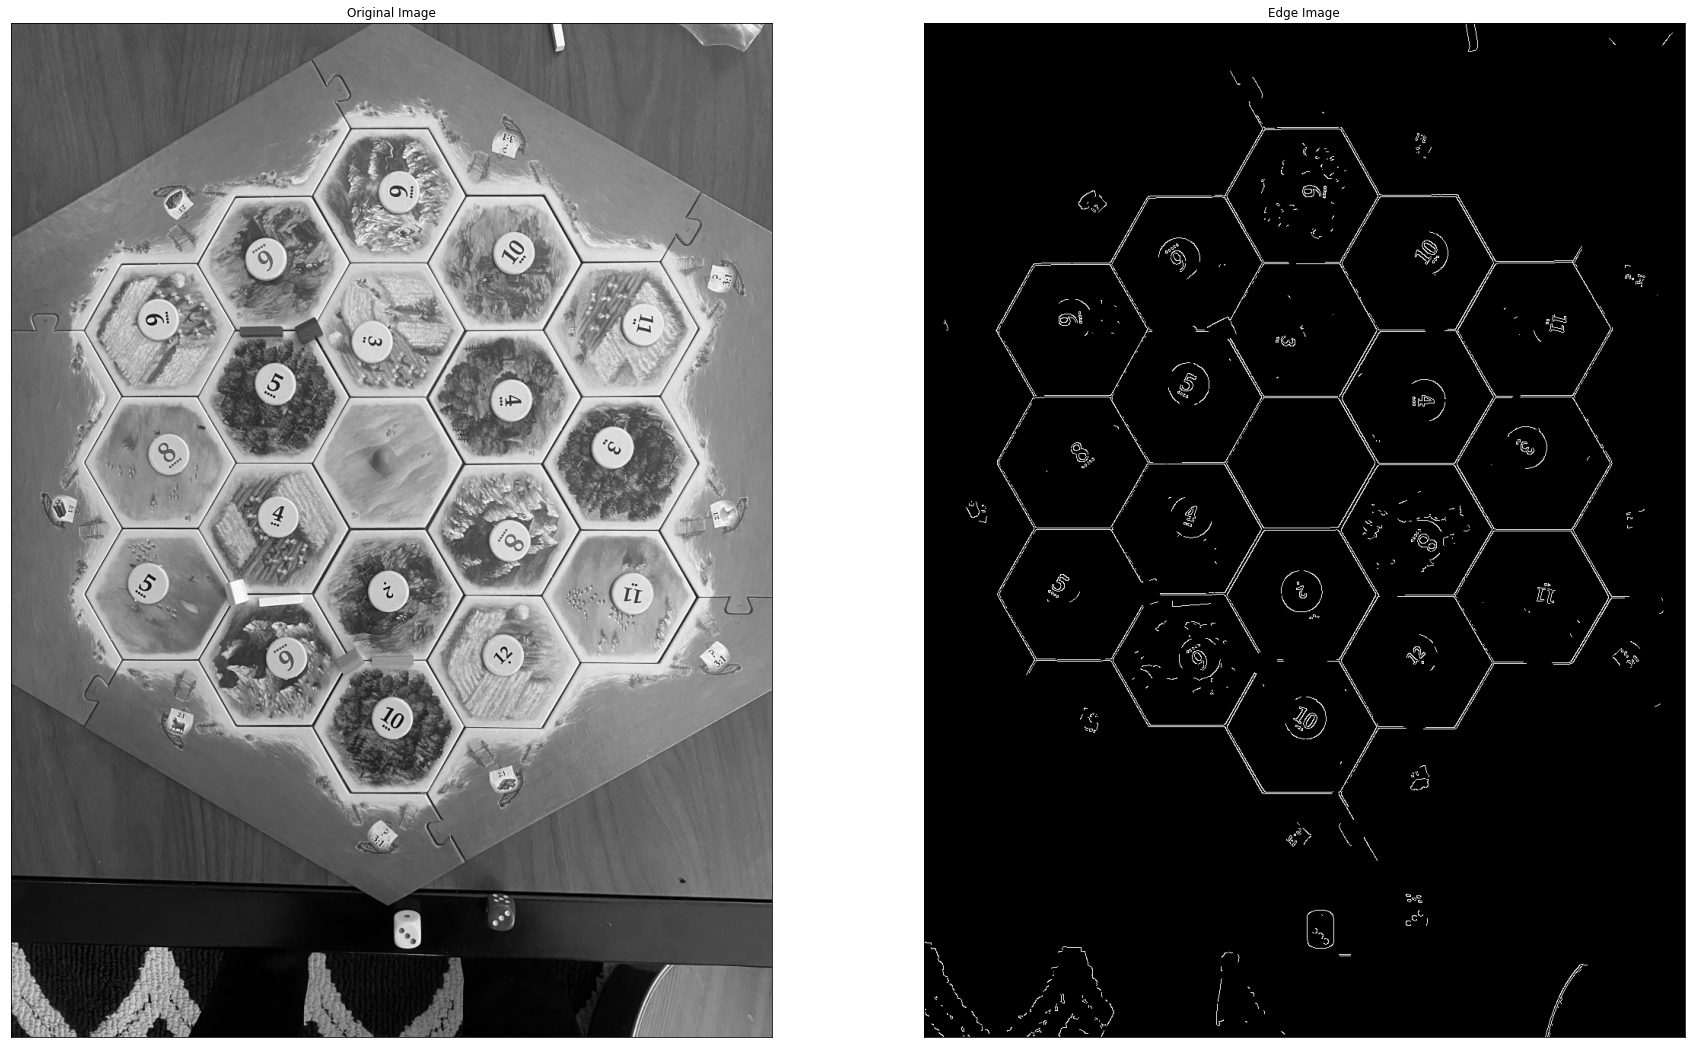

In [3]:
plt.figure(figsize=(30, 30))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

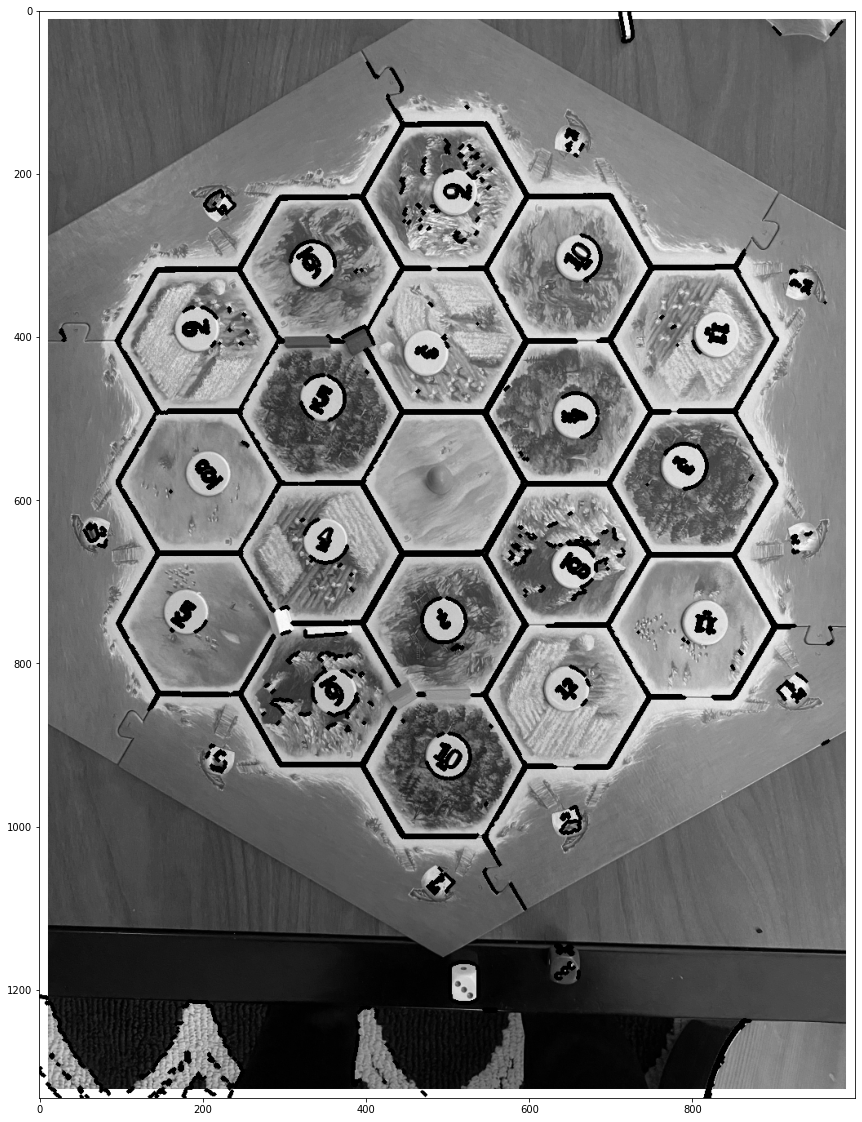

In [39]:
# reset image
img_copy = img.copy()

# use cv findContours to find the contours
# cv.RETR_EXTERNAL: only get the external contours
# cv.CHAIN_APPROX_SIMPLE: only get the contours with no holes
# cv.CHAIN_APPROX_NONE: get all the contours
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# get only contours with large area
contours = [cnt for cnt in contours if cv.contourArea(cnt) > 5000]

# show found contours
figure = plt.figure(figsize=(20, 20))
cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img,cmap = 'gray')
plt.show()

In [ ]:
# only get the contours with a large area
# cv.contourArea: get the area of the contour


In [4]:
def detectHexagon(contour):
    shape = "unidentified"
    peri = cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, 0.04 * peri, True)
    if len(approx) == 6:
        shape = "hexagon"
    return shape



In [12]:
# get contours from image
contours = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

len(contours)

834

12

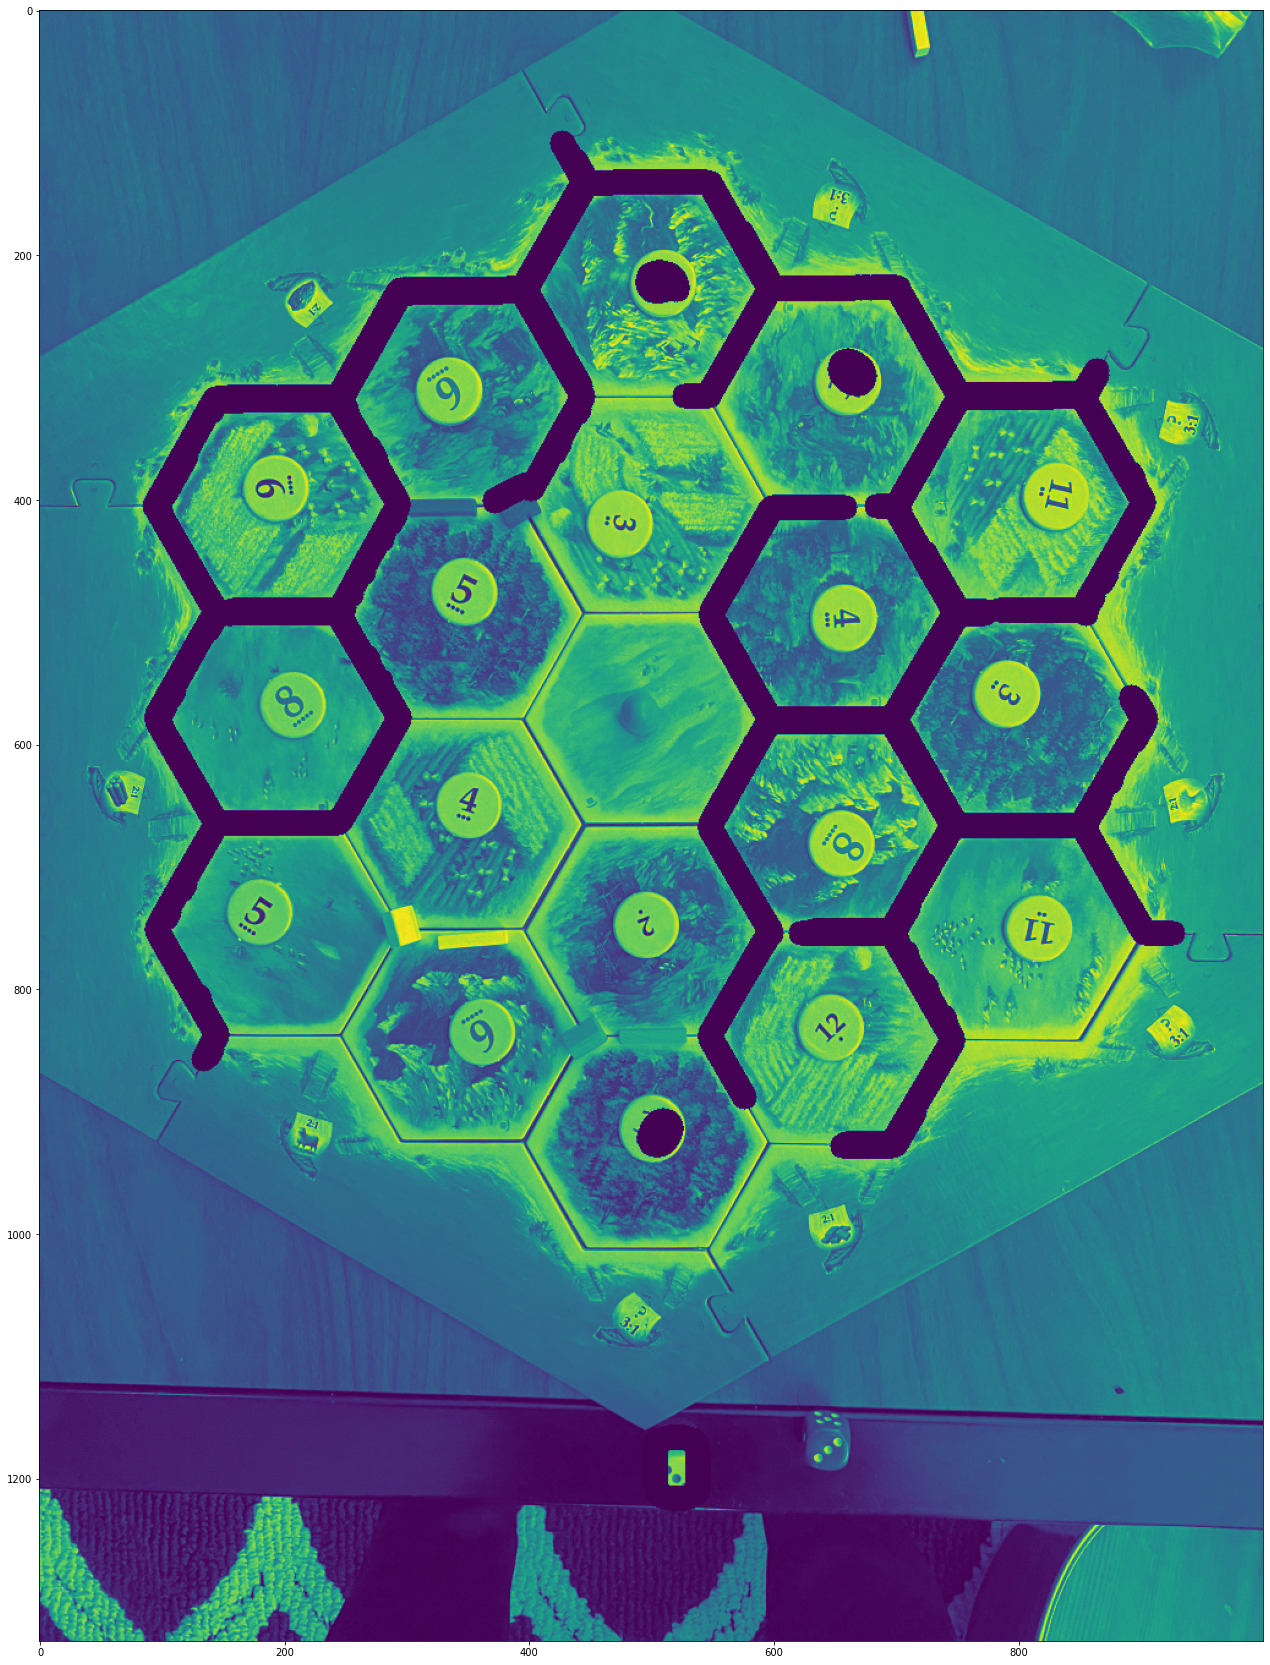

In [15]:
img = cv.imread('photos/IMG_7864.png',0)

#resize image
img = imutils.resize(img, width=1000)

# get only contours with a certain area
contours = [c for c in contours if cv.contourArea(c) > 200]
cv.drawContours(img, contours, -1, (0, 255, 0), thickness=20)
figure = plt.figure(figsize=(30, 30))
plt.imshow(img)
len(contours)

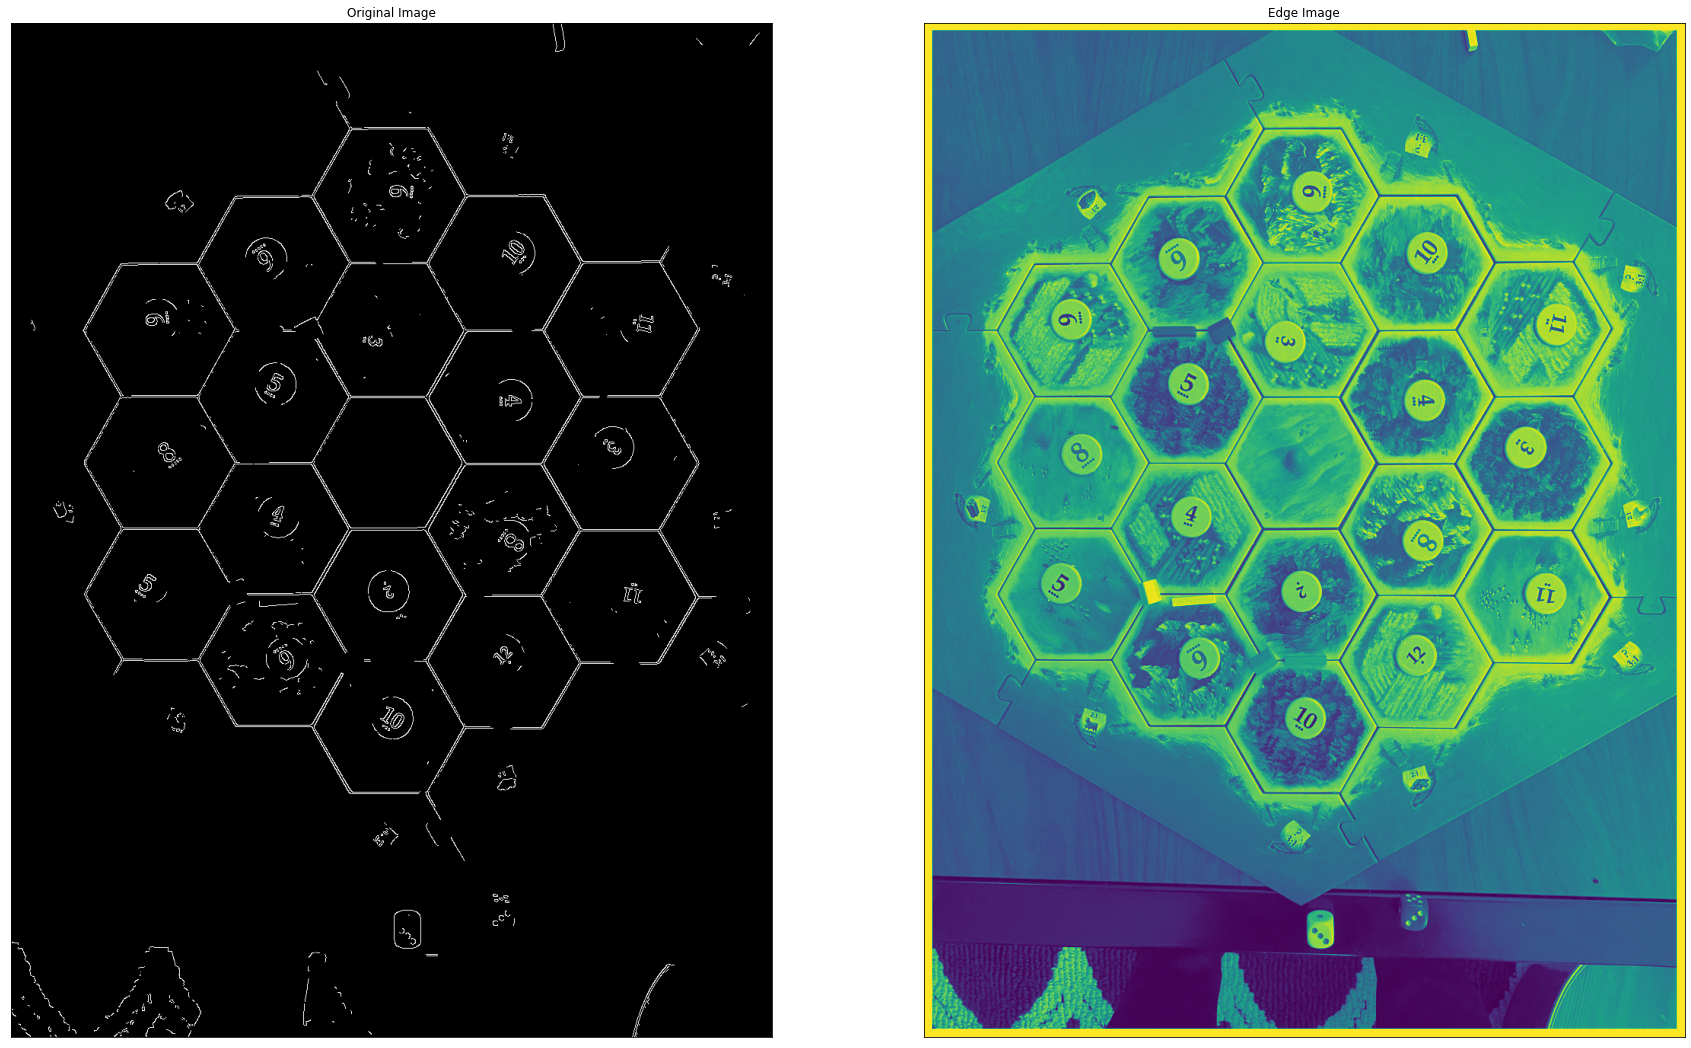

In [32]:
img = cv.imread('photos/IMG_7864.png',0)

#resize image
img = imutils.resize(img, width=1000)

edges = cv.Canny(img,500,650)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
dilated = cv.dilate(img, kernel)

contours = cv.findContours(dilated, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

plt.figure(figsize=(30, 30))
plt.subplot(121),plt.imshow(edges,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
# plt.imshow(dilated,cmap = 'gray')
# draw contours from dilated image over black background
# generate black background
black_background = np.zeros(img.shape, dtype=np.uint8)
cv.drawContours(img, contours, -1, (255, 0, 0), thickness=20)
plt.imshow(img)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
for contour in contours: 
    hull = cv.convexHull(contour)
    # shape = detectHexagon(hull)
    # if shape == "hexagon":
    cv.drawContours(img, [hull], -1, (0,255,0), 3)
    
    cv.imshow("Image", img)
    cv.waitKey(0)